# **발표자: 최보현**

# **EDA란?**

- Exploratory Data Analysis의 약어로, 탐색적 데이터 분석 의미
- 데이터를 다양한 각도에서 관찰하고 이해하는 모든 과정
- 데이터 분석에 있어서 매우 중요한 초기 분석 단계
- 데이터를 분석하고 결과를 내는 과정에 있어 지속적으로 해당 데이터에 대한 "탐색과 이해"가 기반

# **데이터 수집 및 정제 과정**
- 데이터 수집 → 데이터 전처리 → 순수 데이터 → EDA (탐색적 데이터 분석)

# **EDA 왜 할까?**
- 데이터의 잠재적인 문제 발견
    - 이상치, 널 값 등
- 데이터의 다양한 패턴 발견
- 적절한 통계 도구 제시

# **EDA의 단계?**

1. 전체적인 데이터 분석
- 분석의 목적과 목적에 맞는 변수가 무엇인지
- 데이터형 확인/ 데이터의 오류나 누락이 없는지
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지 → 아니라면 그 이유가 무엇인지 확인

2. 데이터의 개별 속성값 관찰
- 개별 데이터를 관찰하며 전체적인 추세와 특이사항 관찰
- 적절한 요약통계 지표 사용 (평균, 중앙값, 분산 등)
- 시각화를 통해 데이터의 개별 속성에 어떤 통계 지표가 적절한지 결정

3. 속성 간의 관계분석
- 개별 속성 관찰에서 찾아내지 못했던 속성들의 조합, 패턴 발견
- 그래프를 통해 시각화하여 속성 간의 관계 분석
- 상관계수를 통한 상관관계 확인

참고 자료: https://dacon.io/codeshare/4899

통계치 분석 (이상치, 결측치)에 대해 더 많은 정보를 얻고 싶으시면 위 링크에 들어가서 공부하시거나 구글링을 통해 보완하는걸 추천드립니다!

# **1. Problem Define**
데이터 셋: https://www.kaggle.com/competitions/titanic/data

타이타닉 호 침몰 사건 당시의 사망자와 생존자를 구분하는 요인 분석을 통해, 승객들의 생존 여부를 예측해보자!

y = f(x)

y: 승객들의 생존 여부

x: 생존 여부에 영향을 미치는 요소들

# **2. Libraries Setting**

In [1]:
# 라이브러리 import

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **3. Data Collection**

In [2]:
#1. csv 파일을 불러오세요. (변수명은 df로 해주세요.)
df = pd.read_csv('train.csv')

In [3]:
#2. df 데이터를 상위 5개의 행만 보이게 출력하세요.
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# df의 컬럼 파악
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**변수의 의미**


- 독립 변수 (x)

    - Pclass (좌석 등급): 1=1등석, 2=2등석, 3=3등석

        - 사회적 계층을 대표 (1등석 = Upper / 2등석 = Middle / 3등석 = Lower)

    - Sex (성별)

    - Age (나이)

    - Sibsp (형제 자매 / 배우자 수)

    - Parch (부모와 자식 수)

        - 탑승한 부모, 자식 수 (일부 아이들은 유모와 함께 탑승했기 때문에 그들의 값은 0)

    - Ticket (티켓 번호)

    - Fare (요금)

    - Cabin (객실 번호)

    - Embarked (정박 항구) : C = Cherbourg, Q = Queenstown, S = Southampton


- 종속 변수 (y)

    - Survived (생존여부): 0 = 사망, 1 = 생존

# **4.Data Preprocessing**

**데이터 shape 확인**

In [5]:
#4. df의 shape을 확인하세요.
# 891 rows, 12 columns
df.shape

(891, 12)

In [6]:
# 보기 편하게 index를 1부터로 수정
df.reset_index(drop=True)
df.reset_index()
df.index += 1
df.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name     Sex   Age  SibSp  \
1                            Braund, Mr. Owen Harris    male  22.0      1   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3                             Heikkinen, Miss. Laina  female  26.0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
5                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
1      0         A/5 21171   7.2500   NaN        S  
2      0          PC 17599  71.2833   C85        C  
3      0  STON/O2. 3101282   7.9250   NaN        S  
4      0            113803  53.1000  C123        S  
5      0            373450   8.0500   NaN        S

**결측치 처리**

<AxesSubplot:>

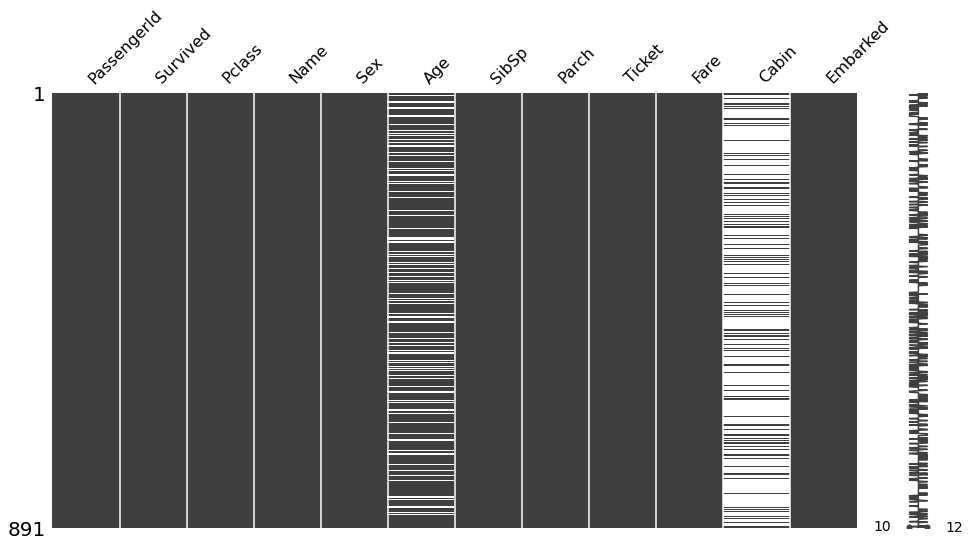

In [7]:
#5. missingno 모듈을 사용해서 데이터에 결측치가 있는지 확인하세요.(5점)
# missingno: 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지
# 하얀색 부분이 널 값을 나타냄
# Age, Cabin, Embarked에 결측치가 있음을 시각적으로 확인할 수 있음
# 특히, Cabin의 경우 결측치가 다른 변수보다 많음
msno.matrix(df, figsize=(16,8))

In [8]:
# 컬럼별 결측값 개수 구하고 싶을 때 (간단히 숫자로 결측치 확인하고 싶을 때)
# Age 컬럼에는 177개의 결측값이, Cabin 컬럼에는 687개의 결측값이, Embarked 컬럼에는 2개의 결측값이 있네?
# 그럼 이 결측값을 어떻게 처리하는게 좋을지 생각해봐야겠다!
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#6. 위 결측치를 보고, 어떻게 전처리 하고 싶은지 작성하세요. (5점)
#7. 하고자 하는 결측치 전처리를 코드로 작성해서 실행해주세요. (5점)

In [10]:
# Cabin은 null 값이 많으니 컬럼 자체를 제외하자
df = df.drop(['Cabin'], axis=1)

In [11]:
# Embarked는 가장 많은 S로 널 값을 채워주자
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
# Age에서 널 값이 있는 행만 제거하자
df = df.dropna()

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.shape
# 전처리 진행 후 (891, 12) -> (714, 11)

(714, 11)

# **5.EDA**

EDA를 통해 데이터를 좀 더 심도 있게 살펴봅시다.

**info() 함수를 통해 데이터셋의 컬럼명, 행의 개수, 데이터 타입 등의 정보 확인하기**

In [16]:
#8. df의 기본 정보를 출력해주세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


**기술통계 확인하기**

In [17]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.250000    0.000000    1.000000   20.125000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  
count  714.000000  714.000000  
mean     0.431373   34.694514  
std      0.853289   52.918930  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.741700  
75%      1.000000   33.375000  
max      6.000000  512.329200

In [18]:
# 기술통계 값은 describe() 함수를 사용해 확인할 수 있음
# 중간값, 결측치, 왜도, 첨도 값은 describe()로 알 수 없기 때문에 이 정보들을 알고 싶다면 아래 코드를 돌려보자

df_stats = df.describe().T

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

for idx, val in enumerate(df_stats.index):

  median_results.append(df[val].median())
  skew_results.append(df[val].skew())
  kurtosis_results.append(df[val].kurtosis())
  null_results.append(df[val].isnull().sum())

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results

df_stats

count        mean         std   min      25%       50%      75%  \
PassengerId  714.0  448.582633  259.119524  1.00  222.250  445.0000  677.750   
Survived     714.0    0.406162    0.491460  0.00    0.000    0.0000    1.000   
Pclass       714.0    2.236695    0.838250  1.00    1.000    2.0000    3.000   
Age          714.0   29.699118   14.526497  0.42   20.125   28.0000   38.000   
SibSp        714.0    0.512605    0.929783  0.00    0.000    0.0000    1.000   
Parch        714.0    0.431373    0.853289  0.00    0.000    0.0000    1.000   
Fare         714.0   34.694514   52.918930  0.00    8.050   15.7417   33.375   

                  max    median  missing  skewness   kurtosis  
PassengerId  891.0000  445.0000        0 -0.000609  -1.224109  
Survived       1.0000    0.0000        0  0.382945  -1.858567  
Pclass         3.0000    2.0000        0 -0.468543  -1.419558  
Age           80.0000   28.0000        0  0.389108   0.178274  
SibSp          5.0000    0.0000        0  2.519577   7.044951  
Parch          6.0000    0.0000        0  2.618914   8.853126  
Fare         512.3292   15.7417        0  4.653630  30.924249

**범주형 데이터와 생존 여부 간 관계 파악**

In [19]:
#10. Pclass, Sex, Sibsp, Parch값과 생존 여부를 groupby() 함수를 통해 각각 출력해주세요. (각 5점)
#11. 출력 값을 보고, 어떤 경우에 생존 확률이 높은지 서술해주세요. (10점)

# 좌석 등급(Pclass)이 높은 1등석이 생존 확률이 가장 높음
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Pclass          
1       0.655914
2       0.479769
3       0.239437

In [20]:
# 성별(Sex)은 여성일 때가 생존 확률이 높음
df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Sex             
female  0.754789
male    0.205298

In [21]:
# 형제 자매/배우자 수는 1명일 때가 생존 확률이 가장 높음
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
SibSp          
1      0.530055
2      0.440000
0      0.371550
3      0.333333
4      0.166667
5      0.000000

In [22]:
# 부모와 자식 수는 3명일 때가 생존 확률이 가장 높음
df[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Parch          
3      0.600000
2      0.573529
1      0.554545
0      0.357006
5      0.200000
4      0.000000
6      0.000000

**종속변수 balance 확인**

In [23]:
# 종속 변수 (y), Survived 데이터가 균형을 이루고 있는지 확인
# 종속 변수의 특정 클래스의 수가 다른 클래스의 수보다 많을 때, 클래스 불균형 데이터를 사용해 분류 모델을 학습하면 분류 성능이 저하되는 문제가 발생함
# -> Imbalanced problem이라고 함
# 여기에서는 데이터가 어느 정도 균형을 이루고 있음
# 균형을 맞추기 위한 Resampling method (Over sampling, Under sampling, Hybrid resampling)
df['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [24]:
total = df['Survived'].value_counts()[0] + df['Survived'].value_counts()[1]

print("Survived = 0은", round(df['Survived'].value_counts()[0] / total*100, 2), '퍼센트')
print("Survived = 1은", round(df['Survived'].value_counts()[1] / total*100, 2), '퍼센트')

Survived = 0은 59.38 퍼센트
Survived = 1은 40.62 퍼센트


**범주형 및 object type 데이터 처리**

In [25]:
#12. df의 기본 정보를 출력해주세요.
# 데이터 타입은 int형, object형, float형이 섞여 있음
# 모델을 돌릴 때, object형은 들어가면 안되기 때문에 수치형으로 타입 변환을 해주어야 함
# 범주형 타입: Name, Sex, Ticket, Embarked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [26]:
#13. 범주형 데이터들이 섞여 있습니다. 후에, 모델을 돌릴 때, 범주형 데이터가 있으면 안될 것 같은데, 어떤 전처리를 하고 싶은지 작성해주세요. (10점)
#14. 13번에서 적은 과정을 코드로 실행해주세요. (5점)

In [27]:
# Name 전처리
# ,(콤마)와 .(점)을 기준으로 해서 중간의 호칭을 구분 (Miss, Mr, Mrs 등)
df['Name'].value_counts()

Braund, Mr. Owen Harris                            1
Kimball, Mr. Edwin Nelson Jr                       1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Johnson, Mr. Alfred                                1
                                                  ..
Allison, Miss. Helen Loraine                       1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Johnson, Mr. William Cahoone Jr                    1
Allison, Master. Hudson Trevor                     1
Dooley, Mr. Patrick                                1
Name: Name, Length: 714, dtype: int64

In [28]:
arr_title = list()
for s in df['Name'].values:
    title = s.split(",")[1].split(".")[0].replace(" ", "")

    arr_title.append(title)

df['Title'] = arr_title
df.tail()

PassengerId  Survived  Pclass                                  Name  \
886          886         0       3  Rice, Mrs. William (Margaret Norton)   
887          887         0       2                 Montvila, Rev. Juozas   
888          888         1       1          Graham, Miss. Margaret Edith   
890          890         1       1                 Behr, Mr. Karl Howell   
891          891         0       3                   Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch  Ticket    Fare Embarked Title  
886  female  39.0      0      5  382652  29.125        Q   Mrs  
887    male  27.0      0      0  211536  13.000        S   Rev  
888  female  19.0      0      0  112053  30.000        S  Miss  
890    male  26.0      0      0  111369  30.000        C    Mr  
891    male  32.0      0      0  370376   7.750        Q    Mr

In [29]:
# 호칭 개수 확인
df['Title'].value_counts()

Mr             398
Miss           146
Mrs            108
Master          36
Rev              6
Dr               6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: Title, dtype: int64

In [30]:
# Mr, Miss, Mrs, Master를 제외하고 나머지는 Others로 분류
df['Title'] = df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Lady','theCountess'
                                   ,'Jonkheer','Dona','Capt'],'Others')

# 또한 프랑스어 및 영어 Ms는 다음과 같이 처리
# Mlle -> Miss  / Mme -> Mrs / Ms -> Miss

df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
df['Title'].value_counts()

Mr        398
Miss      149
Mrs       109
Master     36
Others     22
Name: Title, dtype: int64

In [31]:
# Sex를 전처리
# femal = 0, male = 1로 레이블 인코딩
# 사이킷런의 LabelEncoder를 이용하면 쉽게 변환할 수 있음
df['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [32]:
enc = LabelEncoder()
enc.fit(df['Sex'])
df['Sex'] = enc.transform(df['Sex'])
df['Sex']

1      1
2      0
3      0
4      0
5      1
      ..
886    0
887    1
888    0
890    1
891    1
Name: Sex, Length: 714, dtype: int32

In [33]:
# 숫자로 인코딩된 값
enc.classes_

array(['female', 'male'], dtype=object)

In [34]:
# 해당 값에 대한 숫자
enc.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [35]:
# Embarked(정박 항구)는 S, C, Q로 분류되어 있음
# C = 0, Q = 1, S = 2로 레이블 인코딩
df['Embarked'].value_counts()

S    556
C    130
Q     28
Name: Embarked, dtype: int64

In [36]:
enc = LabelEncoder()
df['Embarked'] = enc.fit_transform(df['Embarked'])
df.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
1                            Braund, Mr. Owen Harris    1  22.0      1      0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
3                             Heikkinen, Miss. Laina    0  26.0      0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
5                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked Title  
1         A/5 21171   7.2500         2    Mr  
2          PC 17599  71.2833         0   Mrs  
3  STON/O2. 3101282   7.9250         2  Miss  
4            113803  53.1000         2   Mrs  
5            373450   8.0500         2    Mr

In [37]:
# Pclass, Sex, Tile, Embarked 범주형 변수들 dummy 처리
# 보통 원-핫 인코딩이라고 불리며 전에 했던 레이블 인코딩과는 다른 방식으로 0과 1로만 이루어진 열을 생성

# Pclass, Dummy 처리
ohe_pclass = pd.get_dummies(df['Pclass'], prefix='Pclass')
ohe_pclass.head()

Pclass_1  Pclass_2  Pclass_3
1         0         0         1
2         1         0         0
3         0         0         1
4         1         0         0
5         0         0         1

In [38]:
df = pd.concat([df, ohe_pclass], axis=1)
df.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
1                            Braund, Mr. Owen Harris    1  22.0      1      0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
3                             Heikkinen, Miss. Laina    0  26.0      0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
5                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked Title  Pclass_1  Pclass_2  Pclass_3  
1         A/5 21171   7.2500         2    Mr         0         0         1  
2          PC 17599  71.2833         0   Mrs         1         0         0  
3  STON/O2. 3101282   7.9250         2  Miss         0         0         1  
4            113803  53.1000         2   Mrs         1         0         0  
5            373450   8.0500         2    Mr         0         0         1

In [39]:
# Sex, Embarked도 같은 방식으로 원-핫 인코딩을 한 다음 df 데이터 프레임에 합친 후 결과
# Sex, Dummy 처리
ohe_sex = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, ohe_sex], axis=1)

# Title, Dummy 처리
ohe_title = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, ohe_title], axis=1)

# Embarked, Dummy 처리
ohe_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, ohe_embarked], axis=1)

df.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
1                            Braund, Mr. Owen Harris    1  22.0      1      0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
3                             Heikkinen, Miss. Laina    0  26.0      0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
5                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  ...  Sex_0 Sex_1  Title_Master  Title_Miss  \
1         A/5 21171   7.2500  ...      0     1             0           0   
2          PC 17599  71.2833  ...      1     0             0           0   
3  STON/O2. 3101282   7.9250  ...      1     0             0           1   
4            113803  53.1000  ...      1     0             0           0   
5            373450   8.0500  ...      0     1             0           0   

   Title_Mr  Title_Mrs  Title_Others  Embarked_0  Embarked_1  Embarked_2  
1         1          0             0           0           0           1  
2         0          1             0           1           0           0  
3         0          0             0           0           0           1  
4         0          1             0           0           0           1  
5         1          0             0           0           0           1  

[5 rows x 25 columns]

**시각화를 통해 데이터 특징 파악**

In [40]:
#15. 데이터 간 상관관계를 히트맵을 통해 분석 (총 15점)
# 조건1. 소수점 둘째 자리까지만 표시 (2점)
# 조건2. 모양은 삼각형으로 나올 것 (3점)
# 조건3. positive, negative 값이 0.2 이상인 상관관계만 추출
# 조건4. 위 조건을 만족하는 positive 상관관계가 0.2 이상인 히트맵과 negative 상관관계가 -0.2 이하인 히트앱을 각각 시각화할 것 (각 5점)

**히트맵으로 상관관계 분석**

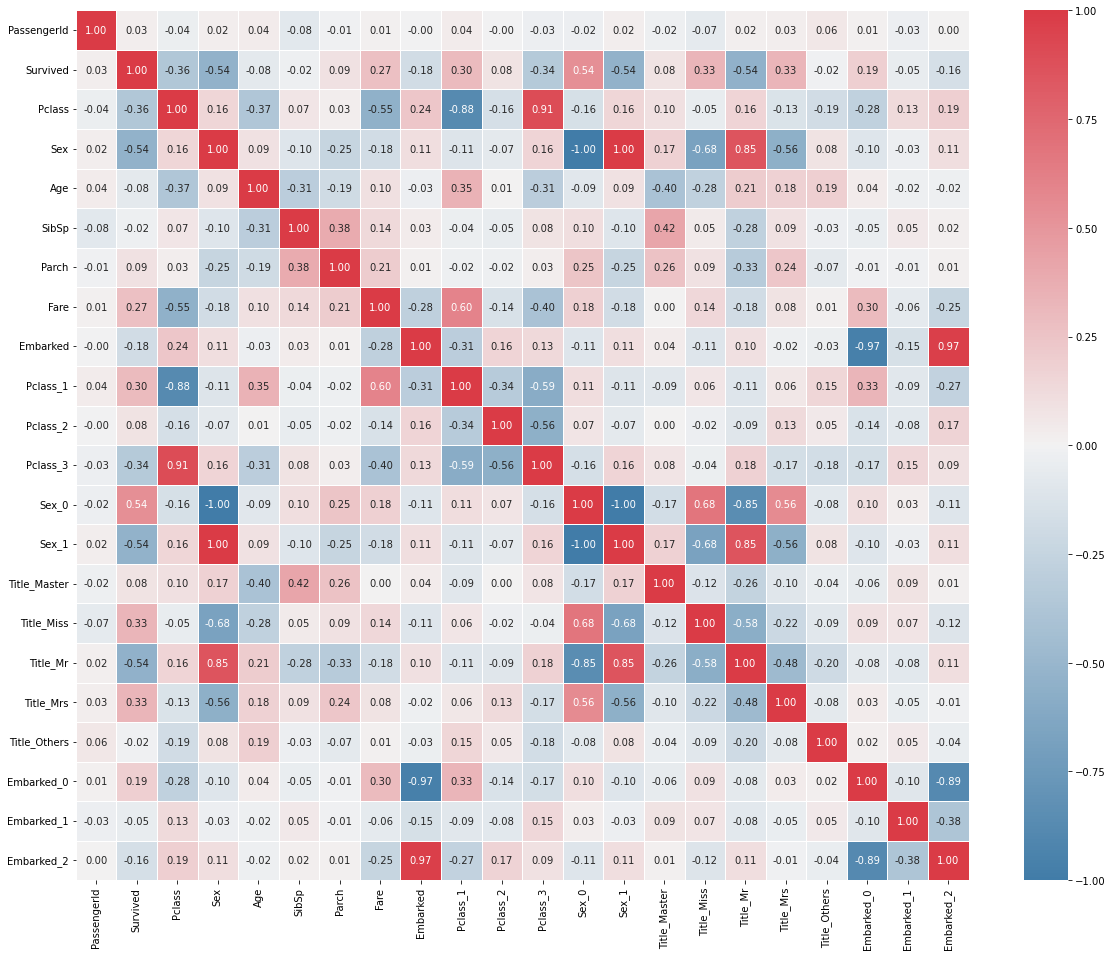

In [41]:
# 시각화를 통해 데이터의 특징을 살펴보자
# 데이터 간 상관관계를 히트맵을 통해 분석
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap=cmap, linewidths=.5, fmt='.2f', annot_kws={"size":10})
plt.show()

In [42]:
# 반대쪽 삼각형은 안 보이게 설정
# fmt = 실제 값 표시
# .2f = 소수점 둘째 자리

df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

df_corr_positie = df_corr[df_corr>=0.2]
df_corr_negative = df_corr[(df_corr <= -0.2) & (df_corr <= 1.0)| (df_corr == 1.0)]

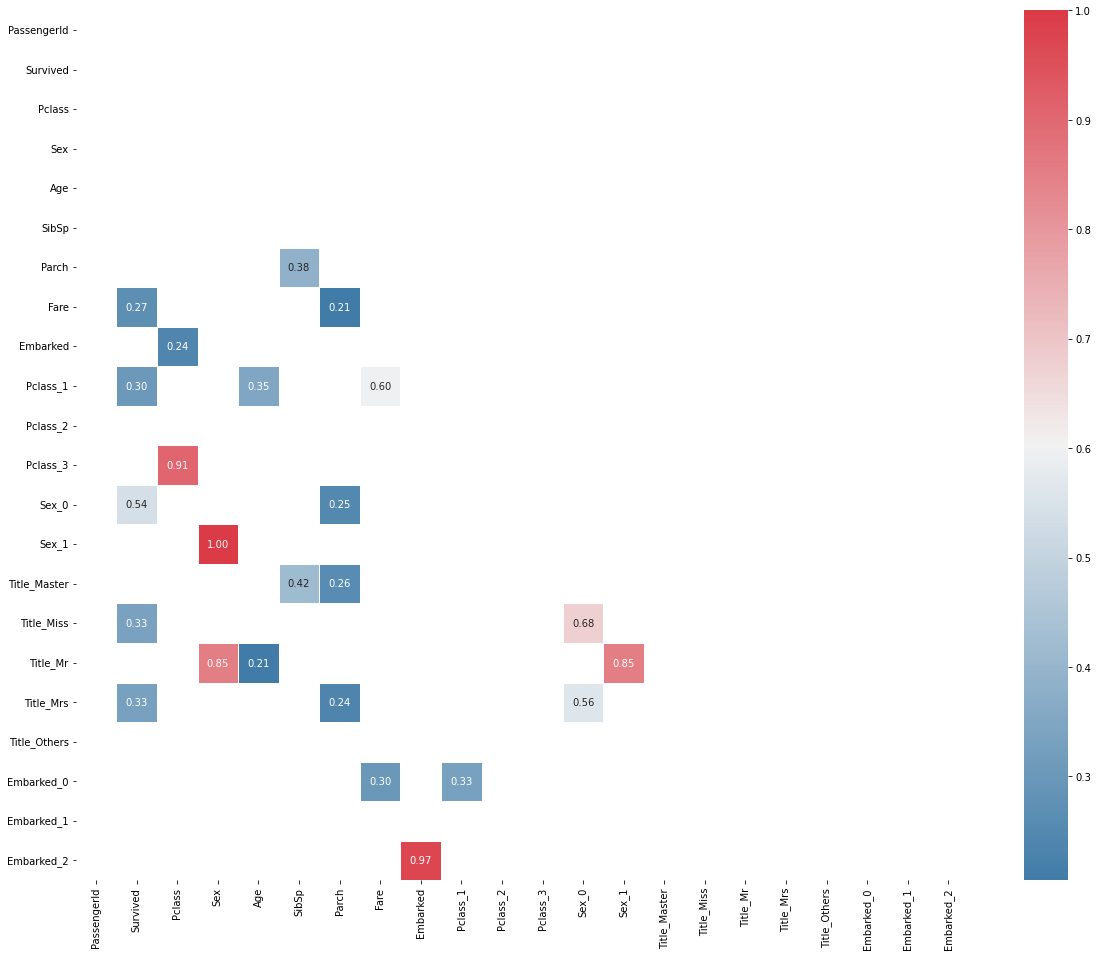

In [43]:
# positive 상관관계 0.2 이상
plt.figure(figsize=(20, 16))

sns.heatmap(df_corr_positie, annot=True, mask=mask, cmap=cmap, linewidths=.6, fmt='.2f', annot_kws={'size':10})
plt.show()

# 생존에 가장 큰 영향을 끼치는 독립 변수는 Sex_female(여성), Tile_Miss, Title_Mrs, Pclass_1, Fare 순으로 나타남
# 즉, 성별이 Survived아 positive 관점에서 가장 큰 상관관계가 있음

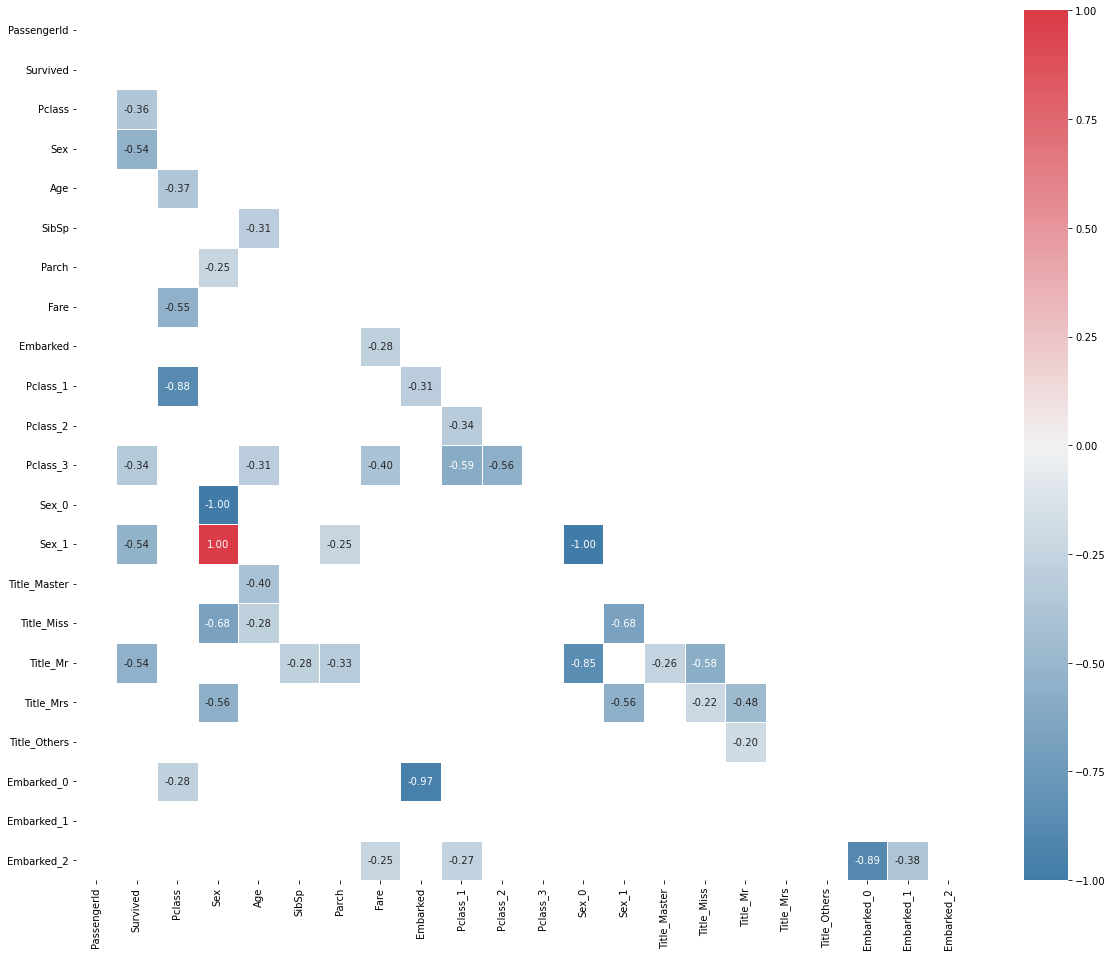

In [44]:
# Negative 상관관계 -0.2 이하
plt.figure(figsize=(20, 16))

sns.heatmap(df_corr_negative, annot=True, mask=mask, cmap=cmap, linewidths=.6, fmt='.2f', annot_kws={'size':10})
plt.show()

# Sex, Sex_male, Tile_Mr, Pclass, Pclass_3 순로 negative 상관관계 확인
# 즉, 남성이 대다수 사망했다는 것과 좌석 등급이 낮을수록 사망 확률이 높다고 예측 가능

In [45]:
#16. 위 시각화 결과를 통해 알 수 있는 정보는 무엇인가요? (5점)

In [46]:
#17. 위 결과를 통해 종속변수와 독립변수의 관계를 시각화 해보고 싶은게 있다면 시각화해 보고 인사이트를 도출하시오. (10점)

**상관관계가 높은 변수 확인**

In [47]:
# 성별이 생존 여부에 큰 영향을 끼치고 있구나!
df_corr.sort_values(by='Survived', ascending=False)[['Survived']]

Survived
Survived      1.000000
Sex_0         0.538826
Title_Miss    0.333216
Title_Mrs     0.330869
Pclass_1      0.301831
Fare          0.268189
Embarked_0    0.193607
Parch         0.093317
Pclass_2      0.084753
Title_Master  0.083128
PassengerId   0.029340
Title_Others -0.015439
SibSp        -0.017358
Embarked_1   -0.049549
Age          -0.077221
Embarked_2   -0.156815
Embarked     -0.179775
Pclass_3     -0.337587
Pclass       -0.359653
Sex_1        -0.538826
Sex          -0.538826
Title_Mr     -0.543456

**종속변수와의 상관관계 확인**

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

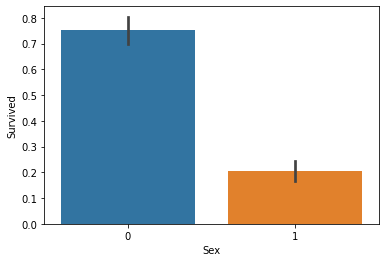

In [48]:
# 여성의 생존 확률이 남성보다 월등히 높음
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

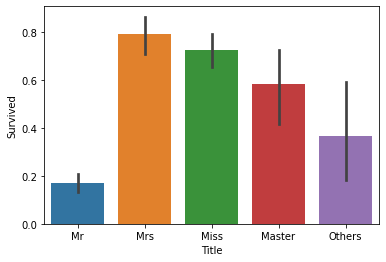

In [49]:
# 여성의 생존 확률이 남성보다 월등히 높음
# 여성: Mrs, Miss, 남성: Mr
sns.barplot(x='Title', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

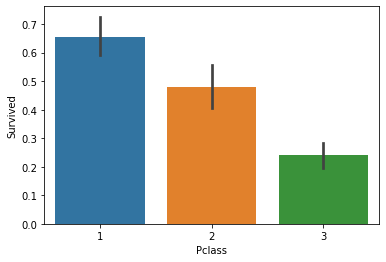

In [50]:
# 좌석 등급이 높을수록 생존 확률이 높음
# 1등성은 주로 중앙에 분포하고, 갑판 가까이에 있어 탈출이 용이
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

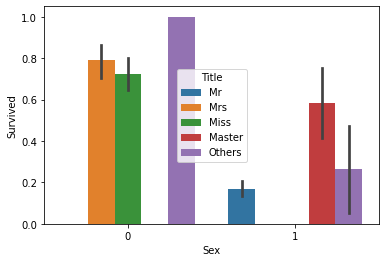

In [51]:
# 호칭과 성별을 함께 봐도 여성의 생존률이 더 높음
sns.barplot(x='Sex',y='Survived', hue='Title', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

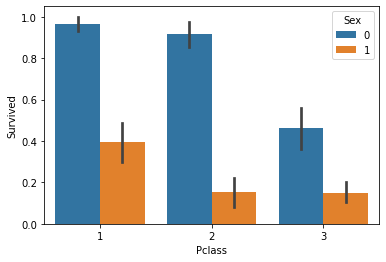

In [52]:
# 좌석 등급과 성별을 함께 볼 경우, 좌석 등급이 1,2인 경우 생존 확률이 높았으며 특히 1등석 남성의 경우 2,3등석보다 생존 확률이 2배 이상 높음
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=df)

In [53]:
# Sex 별로 생존자 확인
pd.crosstab(df.Sex, df.Survived, margins=
            True).style.background_gradient(cmap='Blues')

In [54]:
# Pclass 별로 생존자 확인
pd.crosstab(df.Pclass, df.Survived, margins=
            True).style.background_gradient(cmap='Blues')

In [55]:
# Title 별로 생존자 확인
pd.crosstab(df.Title, df.Survived, margins=
            True).style.background_gradient(cmap='Blues')

In [56]:
#18. 왜 이 모델에 로지스틱 회귀를 사용하면 좋을까?
# 종속변수를 봐보자!
# 종속변수는 (생존 한다, 안 한다.) 이진 분류이다.
# 로지스틱 회귀 분석은 종속 변수를 0과 1 사이로 산출하게 하는 로지스틱 함수를 사용하는 분류 방법론이다.

# 독립변수로는 Pclass, Sex, Age, Sibsp, Parch, Fare
# 종속변수는 Survival
# 이렇게 변수를 설정해서 로지스틱 회귀 모델을 사용하면 생존 여부를 예측할 수 있을 것이다.

# **수고하셨습니다 :)**